<a href="https://colab.research.google.com/github/man0045/Natural_Language_Processing/blob/main/BOW_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
paragraph = """The world of technology is constantly evolving, with new innovations emerging at an unprecedented pace, shaping the way we live, work, and interact with one another. From artificial intelligence and machine learning to blockchain and quantum computing, the rapid advancements in these fields are revolutionizing industries across the globe. AI-driven automation is streamlining business operations, enabling companies to optimize efficiency, reduce costs, and enhance customer experiences like never before. Machine learning algorithms are being used to analyze vast amounts of data, uncovering valuable insights that help businesses make informed decisions, predict trends, and personalize user interactions. Meanwhile, blockchain technology is transforming the financial sector by offering decentralized and secure transactions, reducing the risk of fraud, and improving transparency in supply chains, digital identity verification, and smart contracts. Quantum computing, though still in its early stages, holds the potential to solve complex problems that are currently beyond the capabilities of classical computers, opening doors to groundbreaking discoveries in medicine, cryptography, and material science. As technology advances, cybersecurity has become a major concern, with cyber threats evolving alongside digital innovations. Organizations must invest in robust security measures, such as encryption, multi-factor authentication, and continuous monitoring, to safeguard sensitive data from malicious actors. The rise of the Internet of Things (IoT) has further expanded the digital landscape, connecting billions of devices and generating massive amounts of real-time data that can be leveraged for smart cities, healthcare, and industrial automation. The increasing reliance on technology has also led to ethical discussions regarding data privacy, AI biases, and the responsible use of emerging technologies. Governments and organizations must establish regulations and policies to ensure that technology is developed and implemented ethically, prioritizing user privacy, fairness, and accountability. On a broader scale, the integration of technology into various sectors, including education, healthcare, transportation, and entertainment, is reshaping societal norms and improving the quality of life. E-learning platforms powered by AI and virtual reality are making education more accessible, enabling personalized learning experiences for students worldwide. In healthcare, AI-powered diagnostic tools and robotic surgeries are enhancing medical precision and efficiency, leading to better patient outcomes. Autonomous vehicles and smart traffic management systems are revolutionizing transportation, reducing accidents, optimizing traffic flow, and minimizing carbon emissions. Meanwhile, the entertainment industry is embracing virtual reality, augmented reality, and AI-generated content to offer immersive and interactive experiences for audiences. As technology continues to progress, the world must navigate both its opportunities and challenges, ensuring that innovation serves humanity in a responsible and sustainable manner. The future holds limitless possibilities, and it is up to individuals, businesses, and policymakers to harness the power of technology for the greater good, fostering a world where digital advancements drive positive change, inclusivity, and progress for generations to come."""

In [5]:
import re

In [3]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
stemmer = PorterStemmer
sentences = nltk.sent_tokenize(paragraph)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [4]:
sentences

['The world of technology is constantly evolving, with new innovations emerging at an unprecedented pace, shaping the way we live, work, and interact with one another.',
 'From artificial intelligence and machine learning to blockchain and quantum computing, the rapid advancements in these fields are revolutionizing industries across the globe.',
 'AI-driven automation is streamlining business operations, enabling companies to optimize efficiency, reduce costs, and enhance customer experiences like never before.',
 'Machine learning algorithms are being used to analyze vast amounts of data, uncovering valuable insights that help businesses make informed decisions, predict trends, and personalize user interactions.',
 'Meanwhile, blockchain technology is transforming the financial sector by offering decentralized and secure transactions, reducing the risk of fraud, and improving transparency in supply chains, digital identity verification, and smart contracts.',
 'Quantum computing, tho

In [11]:
corpus = []
for i in range(len(sentences)):
  new_sent = re.sub(r'[^a-zA-Z]', ' ', sentences[i])
  new_sent = new_sent.lower()
  new_sent = new_sent.split()
  review = []
  for word in new_sent:
    if word.lower() not in set(stopwords.words('english')):
      review.append(stemmer.stem(word))
  new_sent= ' '.join(review)
  corpus.append(new_sent)
print(corpus)

['world technolog constantli evolv new innov emerg unpreced pace shape way live work interact one anoth', 'artifici intellig machin learn blockchain quantum comput rapid advanc field revolution industri across globe', 'ai driven autom streamlin busi oper enabl compani optim effici reduc cost enhanc custom experi like never', 'machin learn algorithm use analyz vast amount data uncov valuabl insight help busi make inform decis predict trend person user interact', 'meanwhil blockchain technolog transform financi sector offer decentr secur transact reduc risk fraud improv transpar suppli chain digit ident verif smart contract', 'quantum comput though still earli stage hold potenti solv complex problem current beyond capabl classic comput open door groundbreak discoveri medicin cryptographi materi scienc', 'technolog advanc cybersecur becom major concern cyber threat evolv alongsid digit innov', 'organ must invest robust secur measur encrypt multi factor authent continu monitor safeguard se

In [9]:


# Create an empty list to store processed words
review = []

# Iterate through each word in new_sent
for word in new_sent:
    if word.lower() not in set(stopwords.words('english')):  # Convert to lowercase for better matching
        review.append(stemmer.stem(word))  # Apply stemming and add to the list

# Join the words back into a sentence
new_sent = ' '.join(review)

print(new_sent)  # Output: "run beautiful"


r u n   b e u


In [12]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=2000, stop_words='english', lowercase=True)
X=cv.fit_transform(corpus).toarray()
X

array([[0, 0, 0, ..., 1, 1, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0]])

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

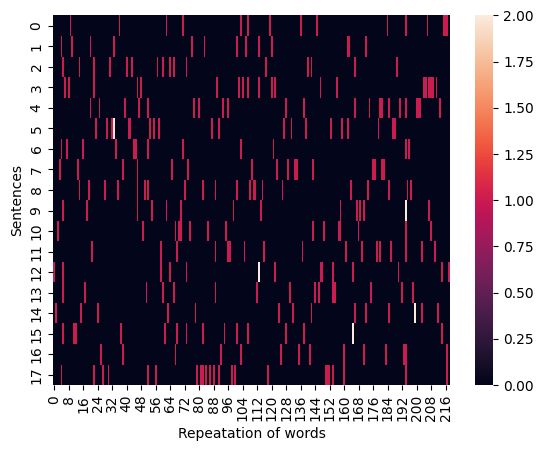

In [18]:
sns.heatmap(X)
plt.xlabel('Repeatation of words')
plt.ylabel('Sentences')
plt.show()
